In [1]:
import numpy as np
import cv2
import glob
from scipy import signal, misc
import matplotlib.pyplot as plt

In [2]:
paths = sorted(glob.glob('../data/Photos/IMG*'))
print(paths)

['../data/Photos\\IMG_20200602_164740.jpg', '../data/Photos\\IMG_20200602_164742.jpg', '../data/Photos\\IMG_20200602_164745.jpg', '../data/Photos\\IMG_20200602_164747.jpg', '../data/Photos\\IMG_20200602_164749.jpg']


In [3]:
images = []

for kImage in paths:
    image = cv2.imread(kImage)
    print(image.shape)
    ##
    images.append(image)

(3024, 4032, 3)
(3024, 4032, 3)
(3024, 4032, 3)
(3024, 4032, 3)
(3024, 4032, 3)


In [34]:
stitcher = cv2.createStitcher() 
(status, stitched) = stitcher.stitch(images)
print(status)
print(stitched.shape)

0
(3028, 10086, 3)


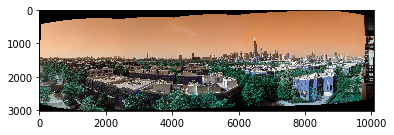

In [35]:
plt.imshow(stitched)

In [36]:
willis = stitched[750:1400,6400:6600,:]

In [47]:
border = 600
stitched_new = stitched[border:stitched.shape[0]-border,3500+border:stitched.shape[1]-border,:]

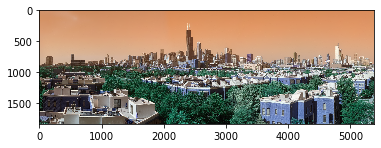

In [48]:
plt.imshow(stitched_new)

In [49]:
cv2.imwrite('test.jpg', stitched_new)

# Careful young man.. this is a dangerous road ahead..
# cv2.imshow("Stitched", stitched)
# cv2.waitKey(0)


True

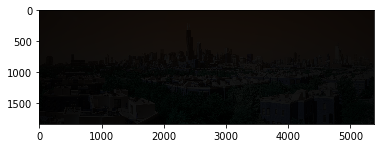

In [70]:

rows, cols = stitched_new.shape[:2]

vig_size = 3000

# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols,vig_size)
kernel_y = cv2.getGaussianKernel(rows,vig_size)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(stitched_new)

# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

plt.imshow(output)  
    
# cv2.imshow('Original', img)
# cv2.imshow('Vignette', output)
# cv2.waitKey(0)

In [71]:
#lets find the willis tower
scale = .2
gray_image = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
gray_willis = cv2.cvtColor(willis, cv2.COLOR_BGR2GRAY)

gray_image = cv2.resize(gray_image,None,fx=scale,fy=scale)
gray_willis = cv2.resize(gray_willis,None,fx=scale,fy=scale)

In [72]:
print(gray_image.shape, gray_willis.shape)

(366, 1077) (130, 40)


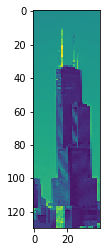

In [73]:

noise_level = 0
gray_willis_noise = gray_willis + np.random.randn(*gray_willis.shape) * noise_level

plt.imshow(gray_willis_noise)

In [74]:
corr = signal.correlate2d(gray_image, gray_willis, boundary='fill', mode='same')

In [75]:
y, x = np.unravel_index(np.argmax(corr), corr.shape)

C:\Users\raves\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


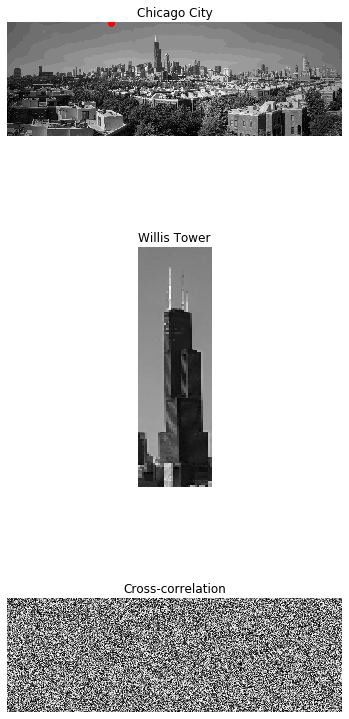

In [76]:
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))

ax_orig.imshow(gray_image, cmap='gray')
ax_orig.set_title('Chicago City')
ax_orig.set_axis_off()

ax_template.imshow(gray_willis, cmap='gray')
ax_template.set_title('Willis Tower')
ax_template.set_axis_off()

ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()

ax_orig.plot(x, y, 'ro')

fig.show()

In [ ]:
#PARKING LOT
#stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))

# gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# c = max(cnts, key=cv2.contourArea)

# mask = np.zeros(thresh.shape, dtype="uint8")
# (x, y, w, h) = cv2.boundingRect(c)
# cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

# minRect = mask.copy()
# sub = mask.copy()
# while cv2.countNonZero(sub) > 0:
#     minRect = cv2.erode(minRect, None)
#     sub = cv2.subtract(minRect, thresh)

# cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
# cnts = imutils.grab_contours(cnts)
# c = max(cnts, key=cv2.contourArea)
# (x, y, w, h) = cv2.boundingRect(c)

# stitched = stitched[y:y + h, x:x + w]